# Programming Assignment

# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

       accX      accY      accZ     gyroX     gyroY     gyroZ timestamp  \
0 -0.496517  3.785628  8.954828 -0.142849 -0.126159 -0.022539   34:22.9   
1 -0.462388  3.869603  9.281898  0.084349  0.096695  0.092130   34:23.0   
2 -0.296084  3.820505  8.930728  0.061763  0.051543  0.071287   34:23.1   
3 -0.469723  3.890110  8.744067  0.007641  0.028679  0.109433   34:23.2   
4 -0.472418  4.109105  8.941207 -0.123640  0.099057  0.051943   34:23.3   

   Activity  
0         1  
1         1  
2         1  
3         1  
4         1  
Cross-validation scores: [0.98213887 0.98146908 0.98213887 0.98258151 0.98213488]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.02      0.04       172
           1       0.98      1.00      0.99      9426

    accuracy                           0.98      9598
   macro avg       0.71      0.51      0.52      9598
weighted avg       0.97      0.98      0.97      9598



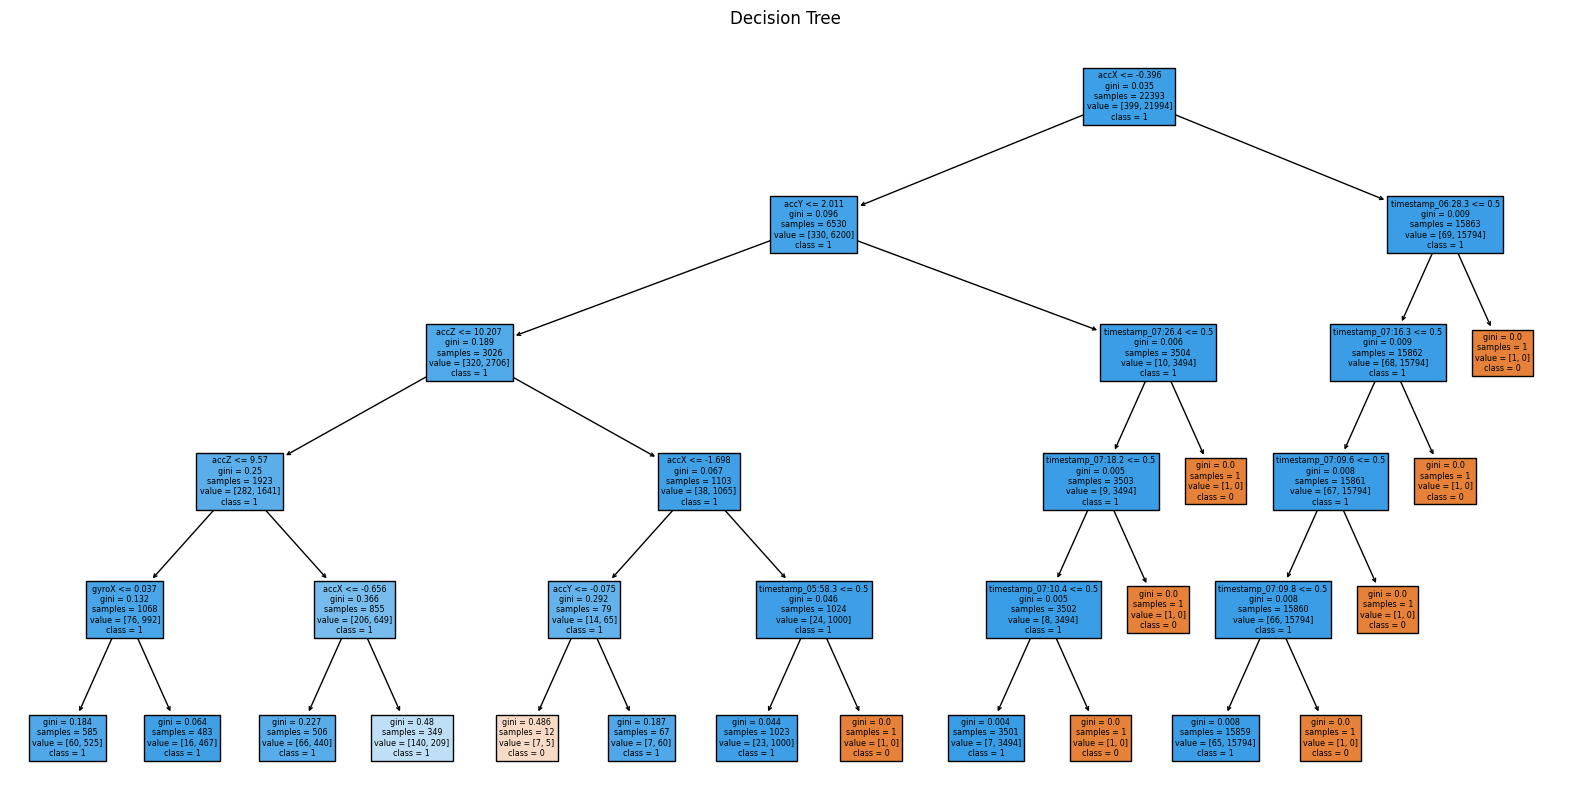

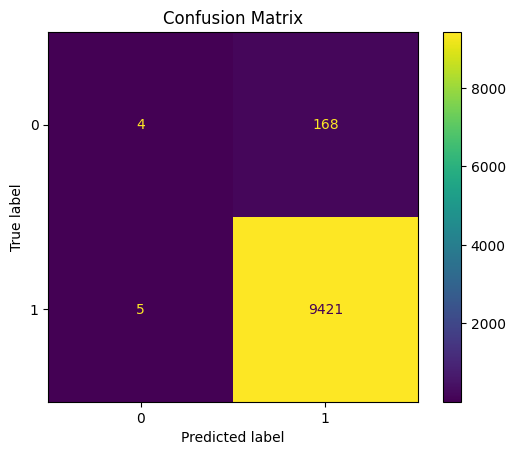

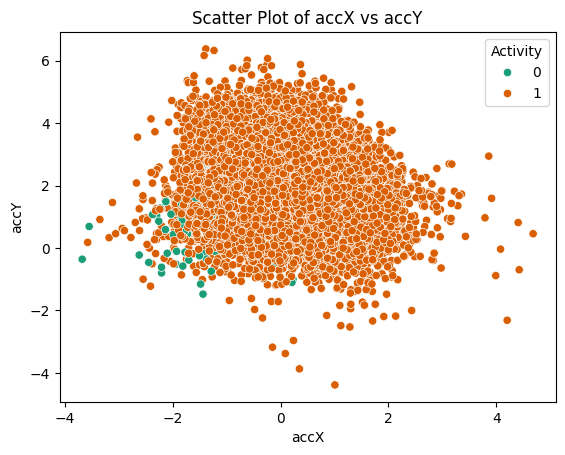

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = 'accelerometer_gyro_mobile_phone_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Define features and target variable
# Assuming the last column is the target variable and the rest are features
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Encode categorical variables using one-hot encoding (if any)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns (in case there are differences due to encoding)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Build a Decision Tree Model with controlled depth
model = DecisionTreeClassifier(max_depth=5)  # Limiting the depth of the tree
model.fit(X_train_encoded, y_train)

# Using cross-validation to evaluate model
scores = cross_val_score(model, X_train_encoded, y_train, cv=5)
print("Cross-validation scores:", scores)

# Evaluate the Model
y_pred = model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust size to your preference
plot_tree(model, filled=True, feature_names=X_train_encoded.columns, class_names=model.classes_.astype(str))
plt.title('Decision Tree')
plt.show()

# Visualize Confusion Matrix for the target variable
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Scatter plot using seaborn
# Replace 'feature1' and 'feature2' with the actual column names of your dataset
feature1 = df.columns[0]  # First feature column
feature2 = df.columns[1]  # Second feature column
target_name = target.name  # Target variable column name

sns.scatterplot(x=feature1, y=feature2, data=df, hue=target_name, palette='Dark2')
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()
